In [ ]:
#*REAL PROJECT 2*#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV 
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
bikesDf = pd.read_csv('C:/Users/erita/OneDrive/Documents/Data Mining 2/day.csv')

X = bikesDf.drop(columns=['cnt', 'dteday'])  
y = bikesDf['cnt']  # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()

rental_bins = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])
X_train, X_test, y_train, y_test = train_test_split(X_pca, rental_bins, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("PCA Results:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.4f}")

print("\nCumulative Explained Variance:")
for i, cm_ratio in enumerate(cumulative_explained_variance):
    print(f"Up to Component {i+1}: {cm_ratio:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nF1 Score:", f1)

PCA Results:
Explained Variance Ratio:
Component 1: 0.2723
Component 2: 0.1423
Component 3: 0.1309
Component 4: 0.1088
Component 5: 0.0872
Component 6: 0.0748
Component 7: 0.0659
Component 8: 0.0588
Component 9: 0.0228
Component 10: 0.0171
Component 11: 0.0117
Component 12: 0.0068
Component 13: 0.0006
Component 14: 0.0001

Cumulative Explained Variance:
Up to Component 1: 0.2723
Up to Component 2: 0.4146
Up to Component 3: 0.5456
Up to Component 4: 0.6543
Up to Component 5: 0.7415
Up to Component 6: 0.8163
Up to Component 7: 0.8822
Up to Component 8: 0.9410
Up to Component 9: 0.9638
Up to Component 10: 0.9809
Up to Component 11: 0.9925
Up to Component 12: 0.9994
Up to Component 13: 0.9999
Up to Component 14: 1.0000

Confusion Matrix:
[[43  0  4]
 [ 0 55  5]
 [ 4  4 32]]

F1 Score: 0.8848103615343845


In [ ]:
print(bikesDf.describe())
print(bikesDf.columns.tolist())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, rental_bins, test_size=0.2, random_state=42)
print(X_train1)
print(y_train1)

     instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
682      683       4   1    11        0        2           1           2   
250      251       3   0     9        0        4           1           3   
336      337       4   0    12        0        6           0           1   
260      261       3   0     9        0        0           0           1   
543      544       3   1     6        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
71        72       1   0     3        0        0           0           1   
106      107       2   0     4        0        0           0           1   
270      271       4   0     9        0        3           1           2   
435      436       1   1     3        0        0           0           1   
102      103       2   0     4        0        3           1           2   

         temp     atemp       hum  windspeed  casual  registered  
682  0.343333  0.323

Acc. Score : 0.8775510204081632
F1 Score : 0.8792935893569249


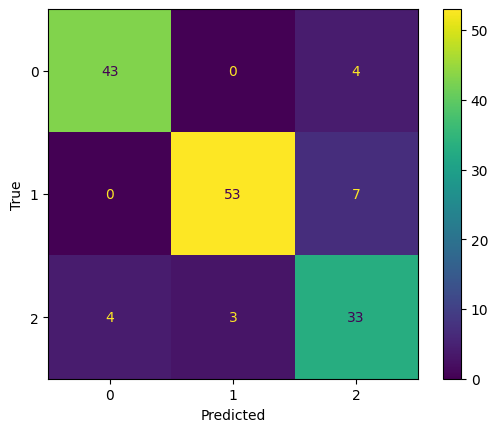

In [ ]:
clf = GaussianNB()
clf.fit(X_train1, y_train1) 
y_pred = clf.predict(X_test1) 

cf_matrix = confusion_matrix(y_test1, y_pred) 
cmd = ConfusionMatrixDisplay(cf_matrix)  
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True') 

print('Acc. Score :', accuracy_score(y_test1, y_pred))
print('F1 Score :', f1_score(y_test1, y_pred, average = 'weighted', pos_label = 'good'))

Acc. Score : 0.9251700680272109
F1 Score : 0.9266457788157904


,instant,season,yr,mnth,weathersit,temp,atemp,windspeed,casual,registered
0,683.0,4.0,1.0,11.0,2.0,0.343333,0.323225,0.342046,327.0,3767.0
1,251.0,3.0,0.0,9.0,3.0,0.633913,0.555361,0.192748,153.0,1689.0
2,337.0,4.0,0.0,12.0,1.0,0.299167,0.310604,0.095783,706.0,2908.0
3,261.0,3.0,0.0,9.0,1.0,0.507500,0.490537,0.178483,1353.0,2921.0
4,544.0,3.0,1.0,6.0,1.0,0.697500,0.640792,0.271775,1077.0,6258.0


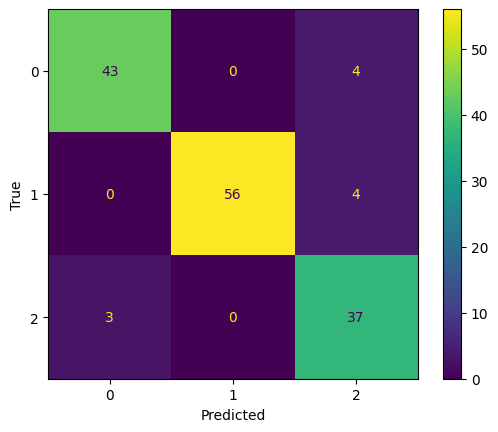

In [ ]:
gnb = GaussianNB()

parameters = {'gnb__var_smoothing': np.logspace(0, -9, num = 100)}

feature_selector = SelectKBest(score_func = f_classif)

pipeline = Pipeline([('feature_selection', feature_selector), ('gnb', gnb)])

clf = GridSearchCV(pipeline, parameters, cv = 5)
clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

cf_matrix = confusion_matrix(y_test1, y_pred) 
cmd = ConfusionMatrixDisplay(cf_matrix) 
cmd.plot()
cmd.ax_.set(xlabel = 'Predicted', ylabel = 'True') 

print('Acc. Score :', accuracy_score(y_test1, y_pred))
print('F1 Score :', f1_score(y_test1, y_pred, average = 'weighted', pos_label = 'good'))
clf.best_estimator_

features = feature_selector.fit_transform(X_train1, y_train1) 
feature_idx = feature_selector.get_support(indices = True)
X_train1 = pd.DataFrame(X_train1)
feature_names = X_train1.columns[feature_idx]

features = pd.DataFrame(features, columns = feature_names)
features.head()

In [ ]:
# "gnb__var_smoothing': np.logspace(0, -9, num = 100)" This parameter is used in Gaussian Naive Bayes to avoid division by zero during 
# probability estimation by adding a small value to the variances of all features. The (0, -9) is used to signal the starting point and the 
# ending point of the sequence, (10^0, 10^-9). The (num = 100) tells the model to select 100 different smothing parameters from the seqence. 
# By searching over a wide range of values, the grid search algorithm can find the optimal smoothing parameter that maximizes the model's 
# performance on the dataset. 